In [11]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')
%matplotlib inline

In [12]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

<h3>Leitura dos dados: Verifica 1, Verifica 3 e amostra de Verifica 3</h3>

In [17]:
df = pd.read_csv('conhecimento.csv')

df1 = df[df.verifica==1].copy().reset_index(drop=True)
df3_full = df[df.verifica==3].copy().reset_index(drop=True)

ids_3 = np.random.choice(df3_full.id, len(df1), replace=False)
df3 = df[df.id.isin(ids_3)].copy().reset_index(drop=True)

<h3>Definição das funções usadas</h3>

In [16]:
def plt_desv(d, desvio, media, x, cor):
    depois = media+(d*desvio)
    antes = media-(d*desvio)
    qta = len(x[(x>antes) & (x<depois)])
    label = int((qta*100)/len(x))
    
    plt.axvline(depois, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(depois, (d*2)/10, ' %s (%s%%)' % (d, label), color=cor)
    
    plt.axvline(antes, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(antes, (d*2)/10, ' -%s' % d, color=cor)
def densidade(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    
    ################### - 1 - #####################
    x = df1[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='red')
    plt.text(media,3, ' Média', color='red')
    
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='red')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#ffa284')
    plt_desv(2, desvio, media, x, '#ff7b5a')
    plt_desv(3, desvio, media, x, 'red')
    ################### - 3 - #####################
    x = df3_full[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='blue')
    plt.text(media,3, ' Média', color='blue')
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='blue')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#cfb1ff')
    plt_desv(2, desvio, media, x, '#9265ff')
    plt_desv(3, desvio, media, x, 'blue')
def distribuicao(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot(ax=ax, legend=False, c='r', figsize=(15,8))
    df3[col].plot(ax=ax, legend=False, c='b', figsize=(15,8))
    
def compara(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot.kde(ax=ax, legend=False, c='r', figsize=(15,8), label='df1')
    df3[col].plot.kde(ax=ax, legend=False, c='b', figsize=(15,8), label='df3_amostra')
    df3_full[col].plot.kde(ax=ax, legend=False, c='g', figsize=(15,8), label='df3_full')
    ax.legend(loc='upper left')

<h2>Visualização dos dados</h2>

<h3>Quantidades</h3>

In [22]:
print('Total', len(df))
print('Verifica 1', len(df1))
print('Verifica 3', len(df3_full))
print('Amostra Verifica 3', len(df3))
print(df.orb_pto.value_counts())

Total 388551
Verifica 1 113184
Verifica 3 275367
Amostra Verifica 3 113184
221_074    200773
221_067    100057
221_070     62542
226_070     25179
Name: orb_pto, dtype: int64


<h3>Compara densidade de distribuição entre as variáveis</h3>

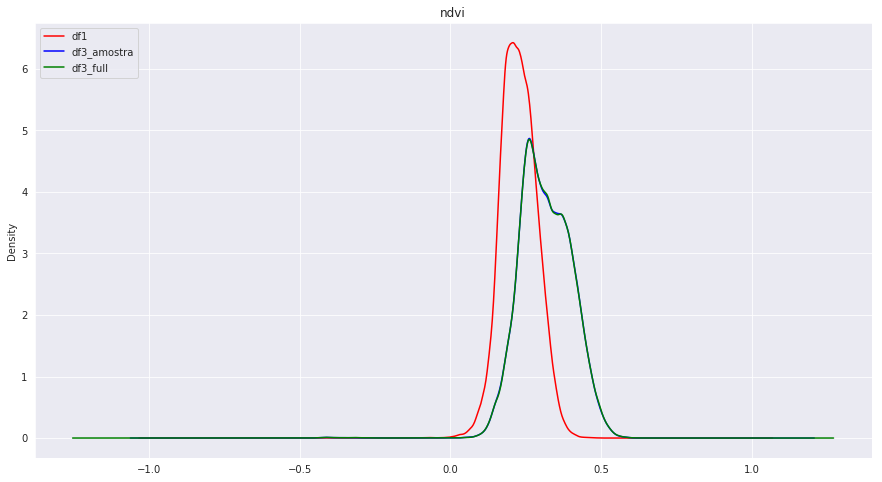

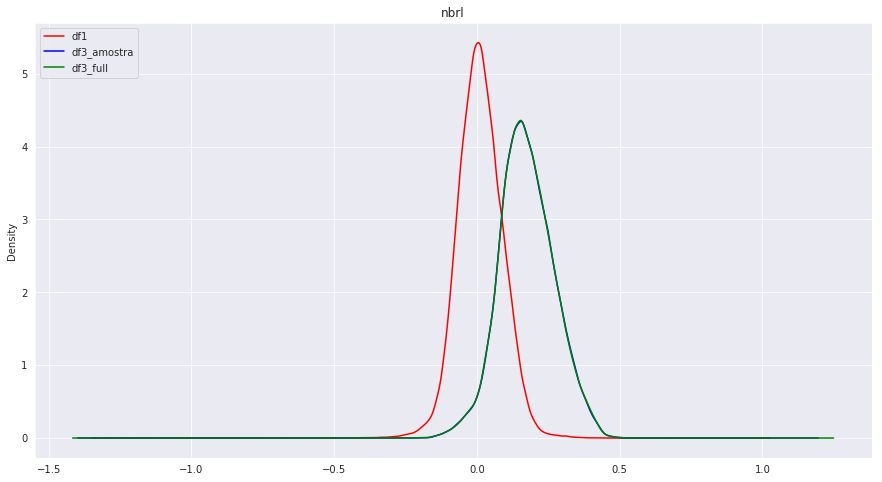

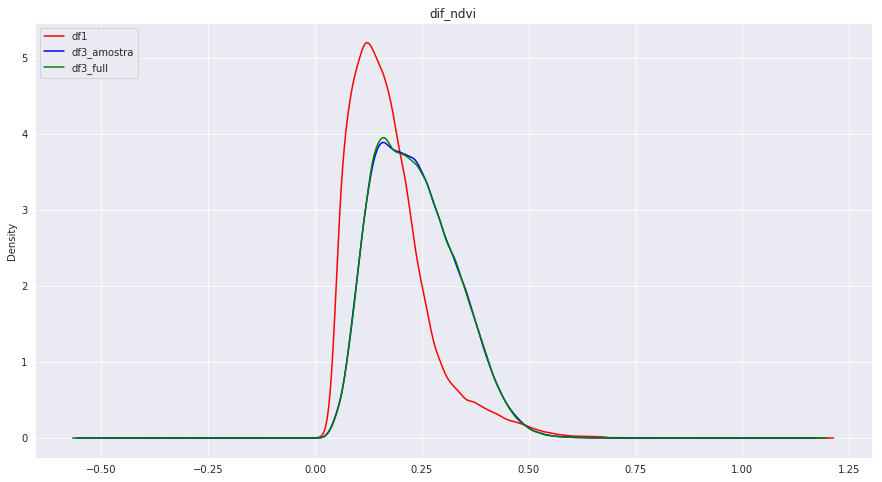

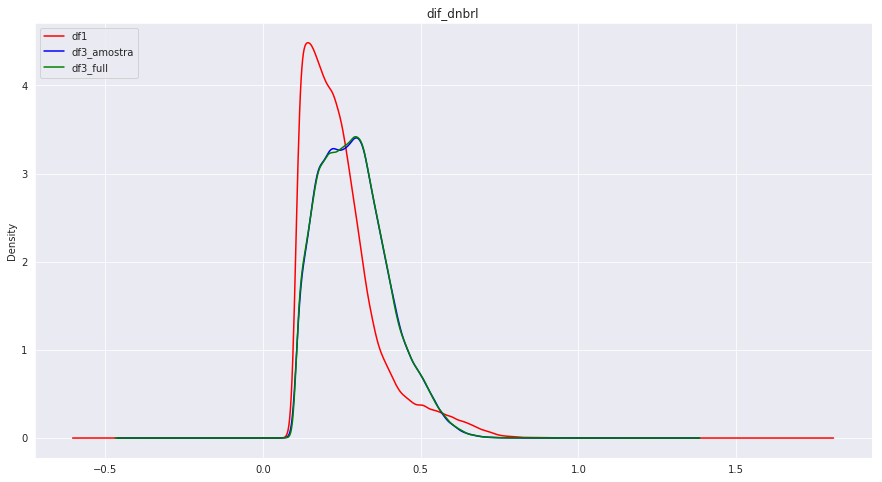

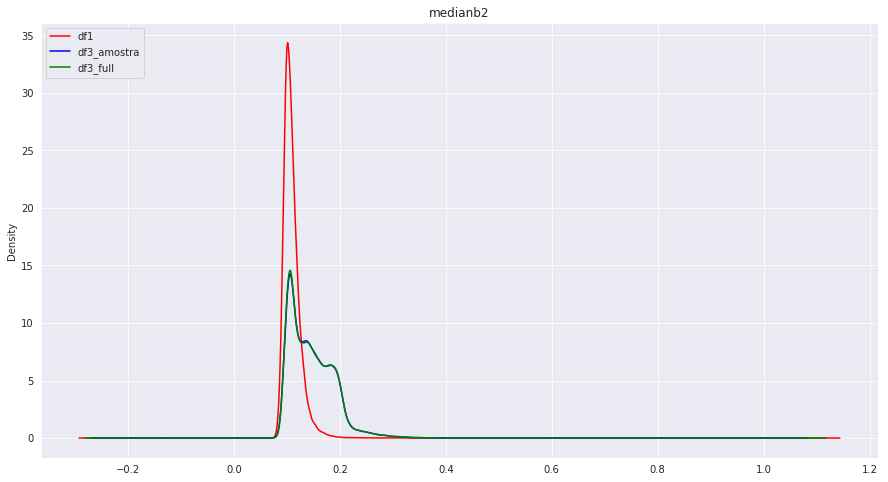

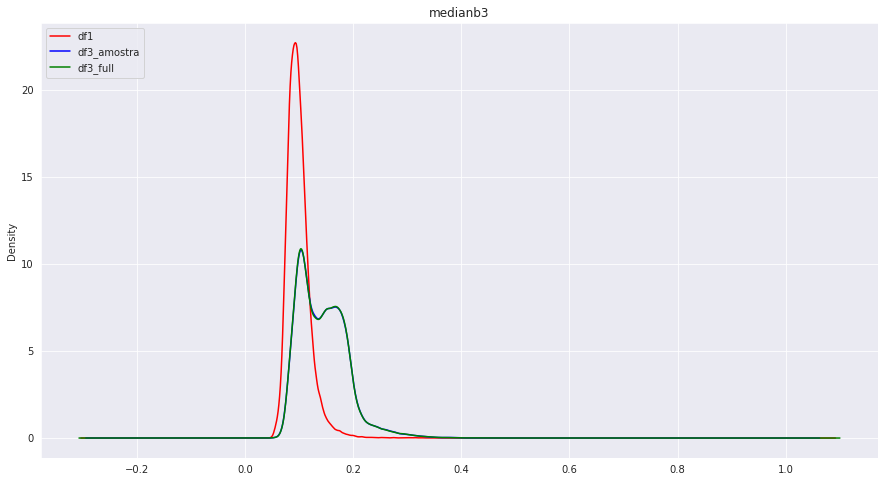

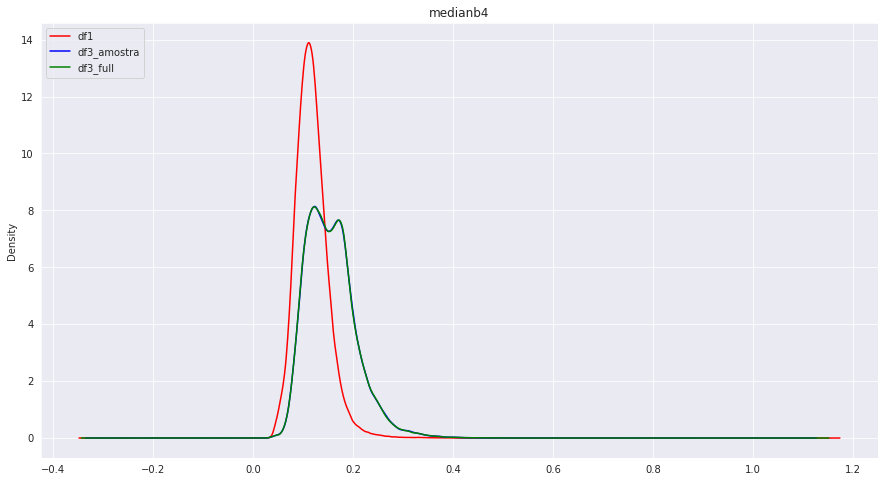

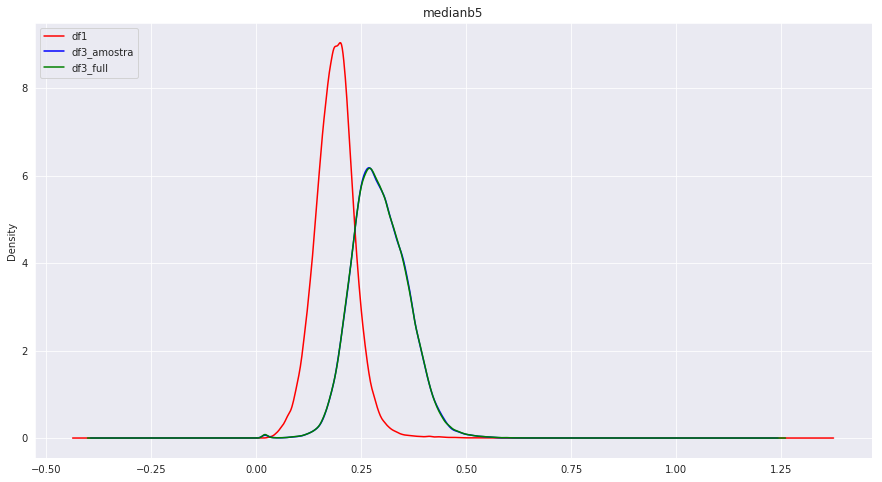

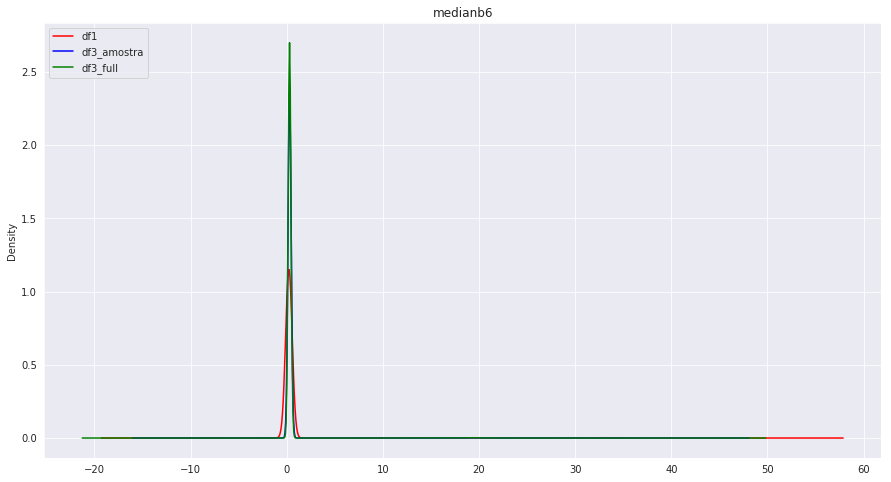

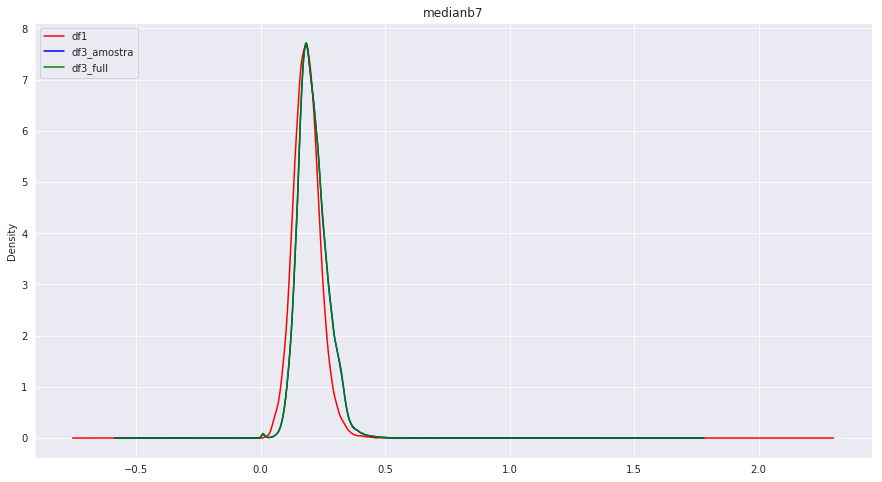

In [23]:
for col in cols:
    compara(col)

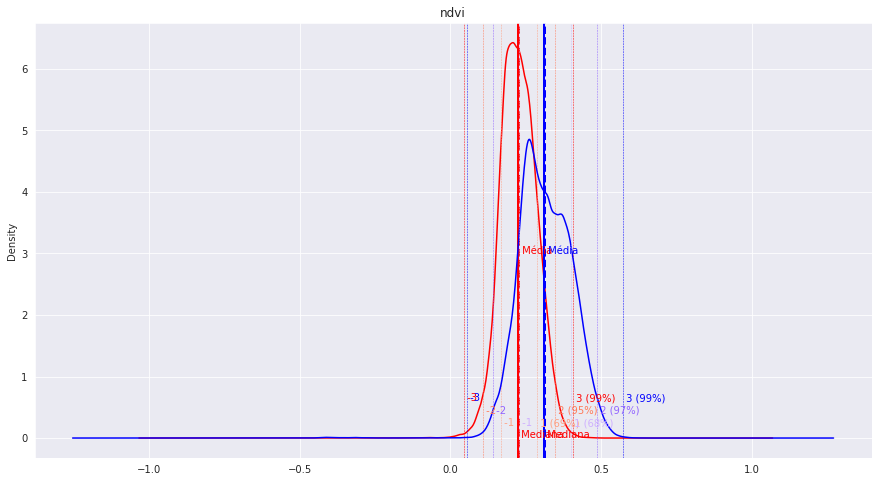

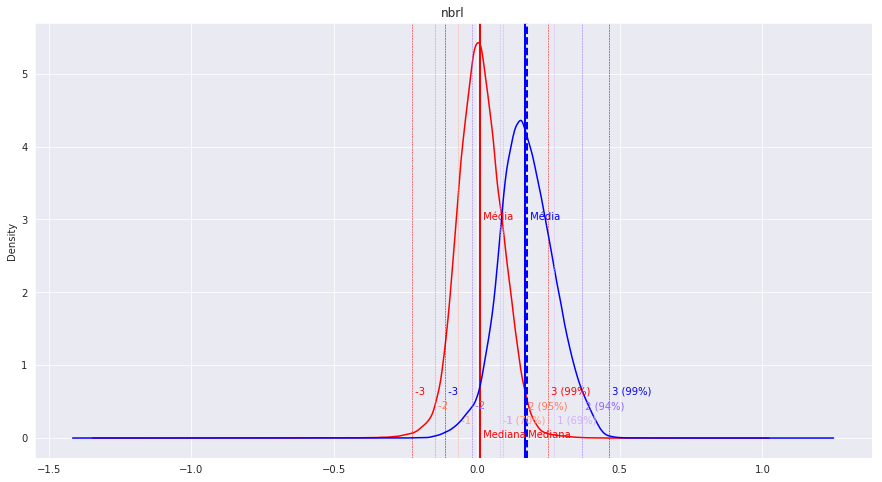

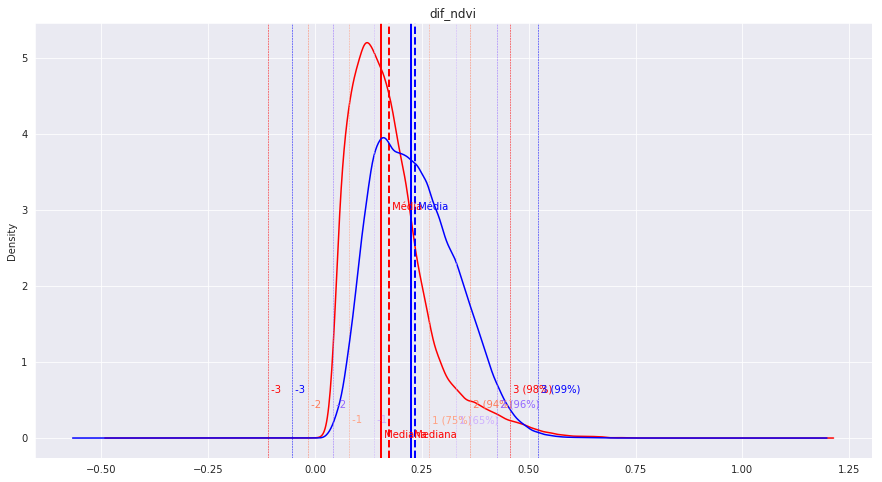

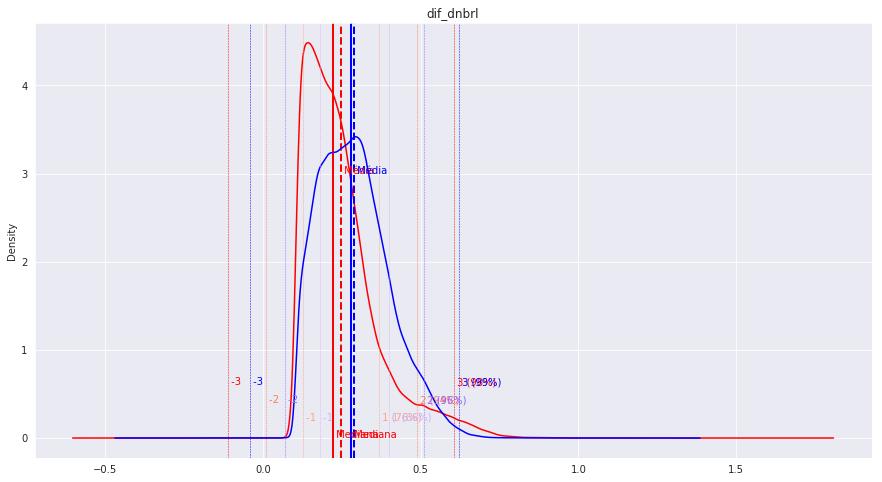

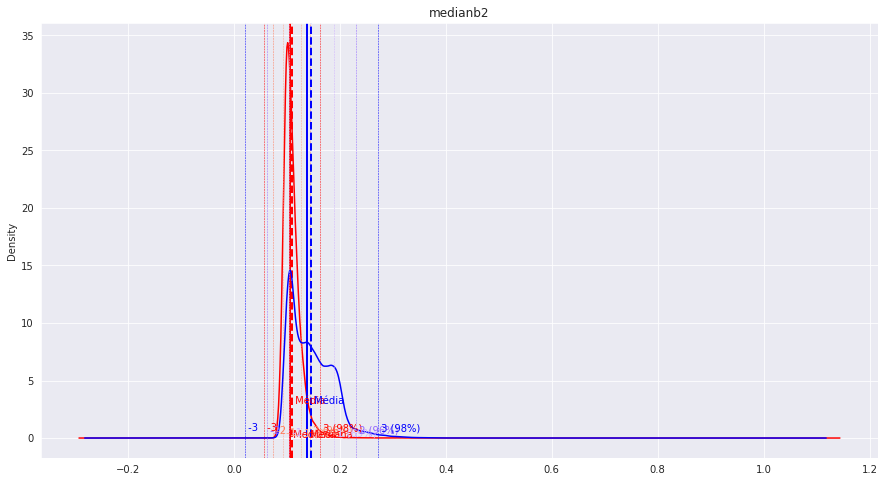

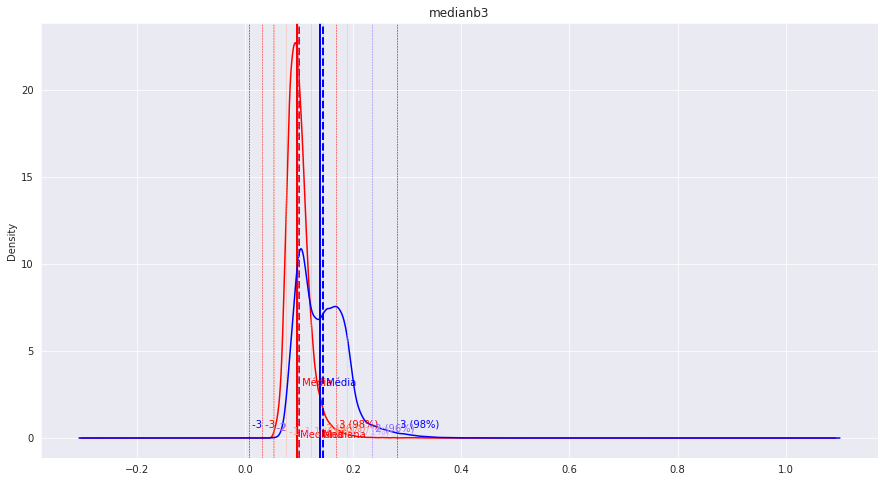

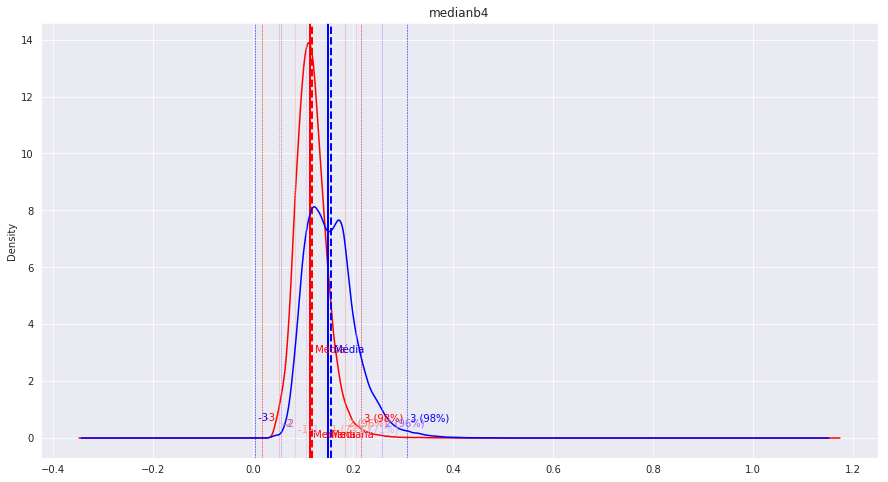

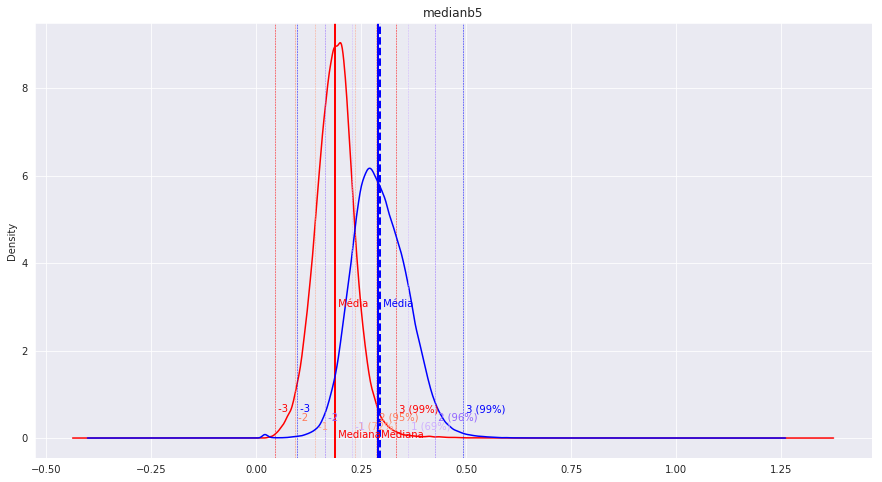

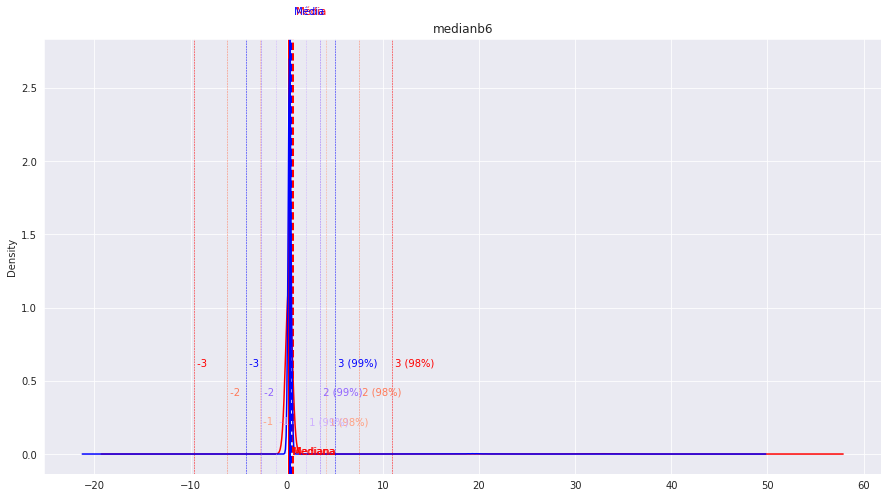

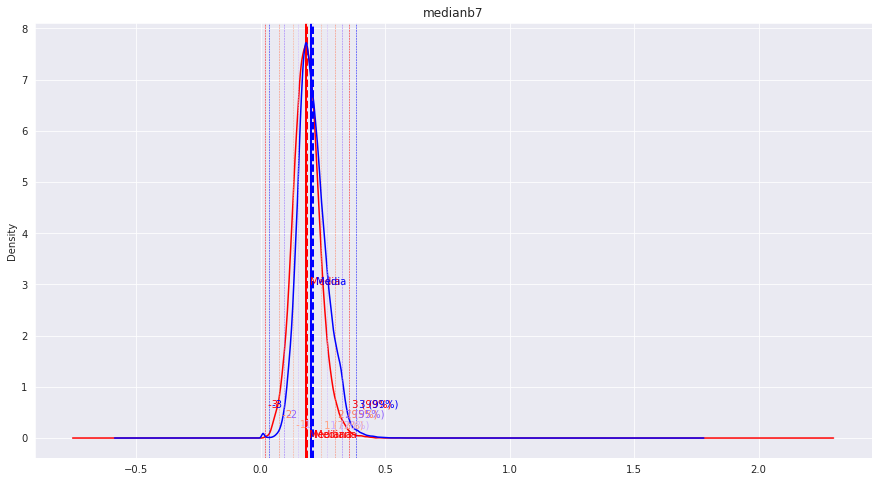

In [24]:
for col in cols:
    densidade(col)

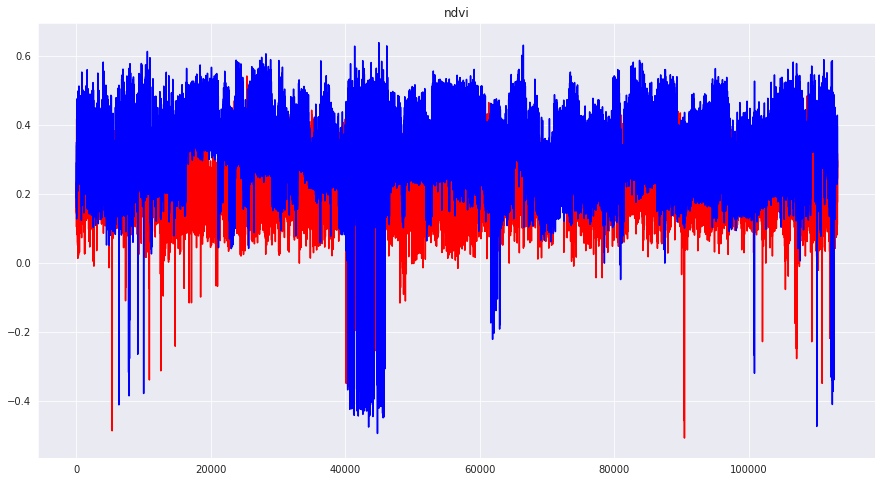

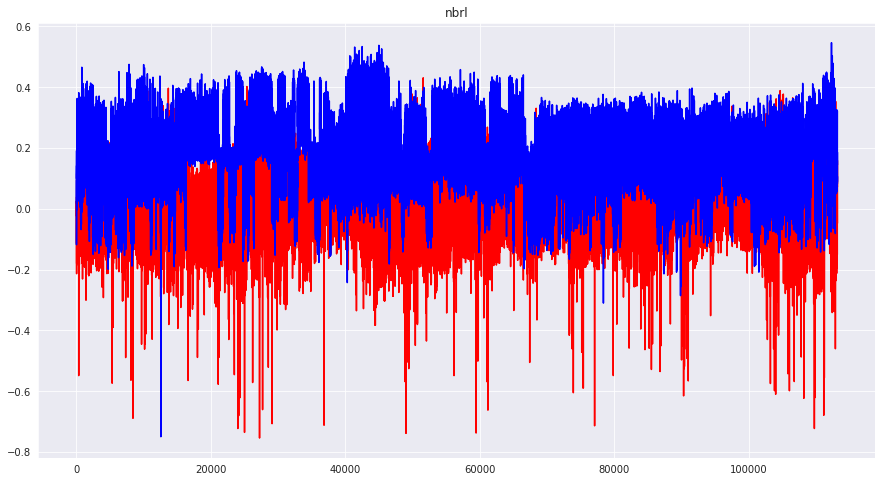

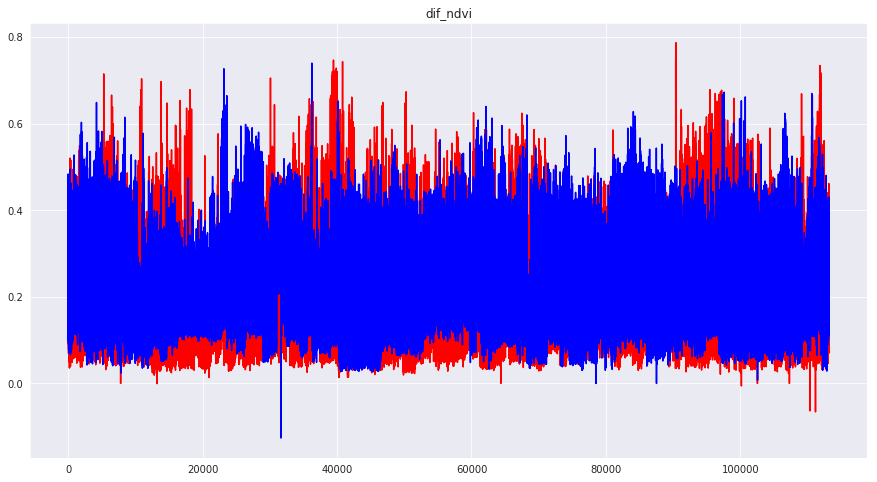

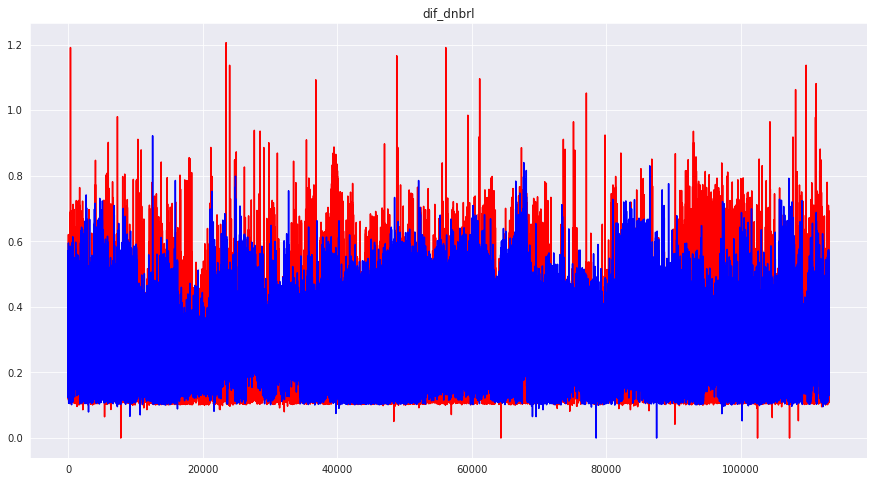

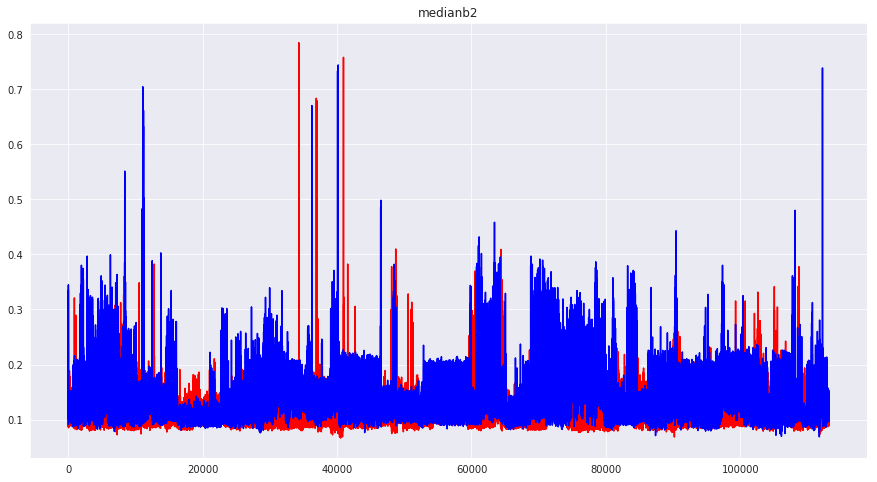

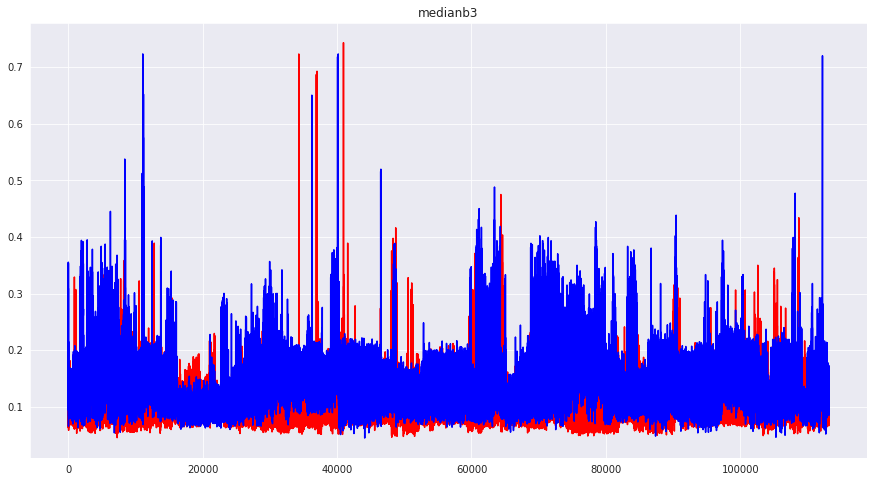

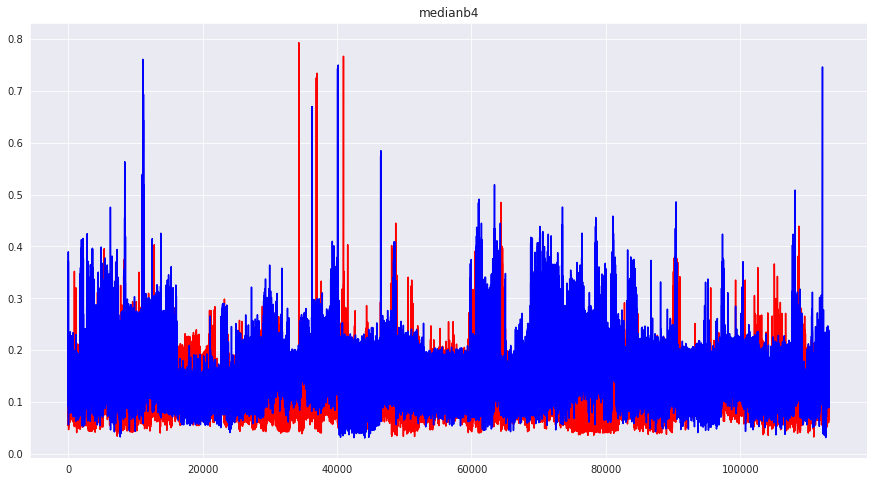

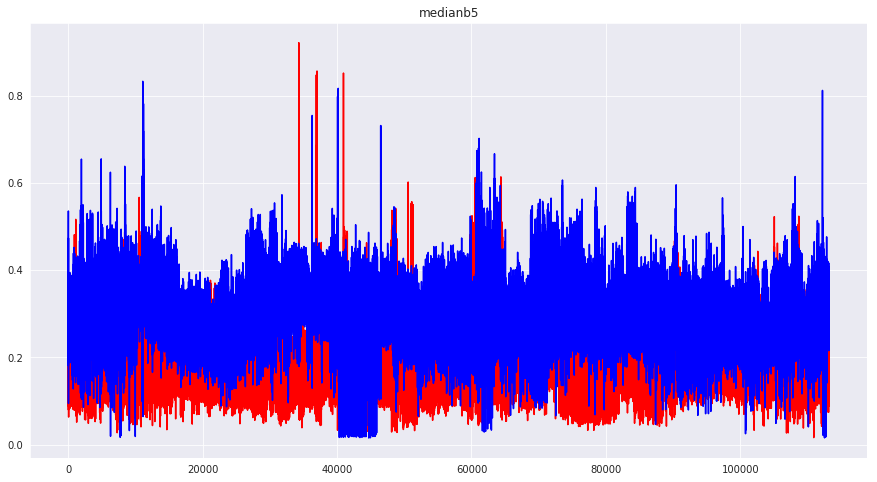

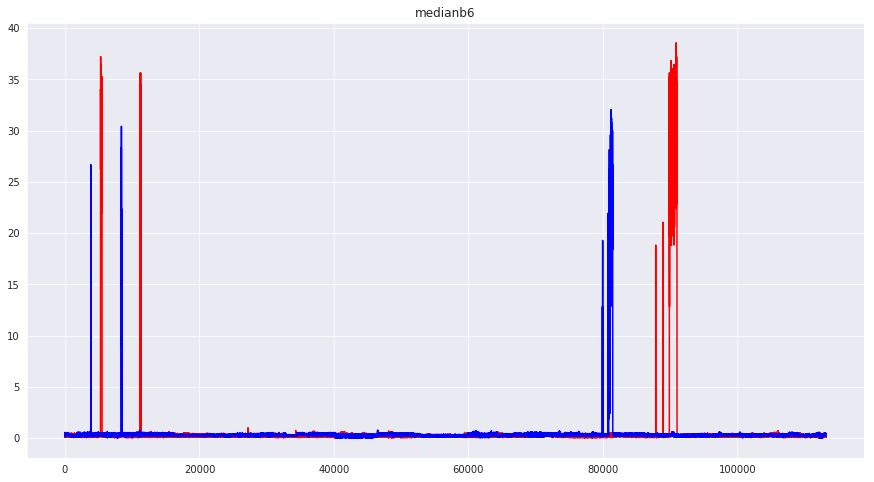

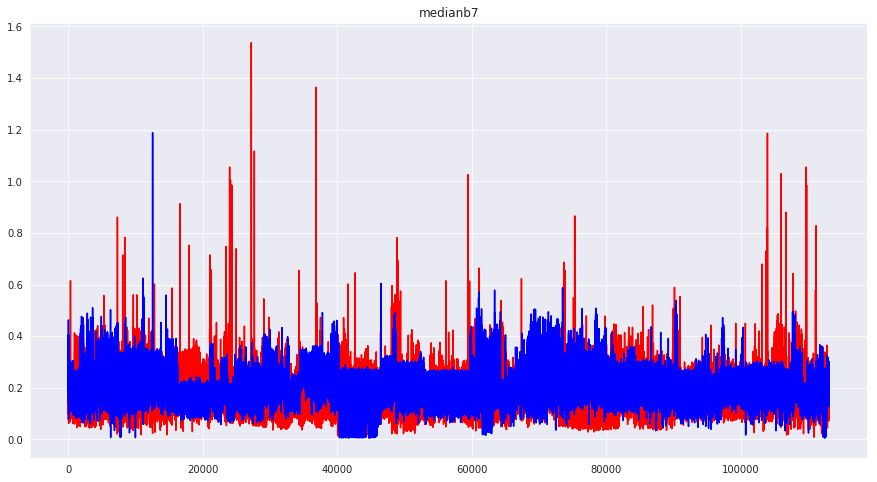

In [25]:
for col in cols:
    distribuicao(col)

<h3>Conclusão</h3>
<pre>
- Existe muito mais dado de verifica 3 do que 1.
- Alguns atributos não são separados entre verifica 1 e 3
- Visualmente os atributos <b>nbrl, medianb5</b>, são os que melhores separam o verifica 1 do 3
- Nos melhores atributos, os dados são bem separados até o <b>1 Desvio padrão</b>, 
  com aproximadamente 70% dos dados. Apartir do 2 desvio, os dados começam a se misturar 
</pre>